# Stack Overflow Analysis of WSL users 2022

In [137]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas
from matplotlib.ticker import PercentFormatter

In [138]:
sns.set_theme()
sns.set_context("paper")
sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})

In [139]:
df=pandas.read_csv('Data/survey_results_public.csv')

In [140]:
#Function for returning a dataframe with a particular column exploded based on a string separator

def col_expand(dataframe,colname,separator):
    df=dataframe.copy()
    df[colname]=df[colname].str.split(separator)
    df = df.explode(colname)
    return df

## Personal vs Professional use comparison

In [141]:
dfpro =col_expand(df,'OpSysProfessional use',';')
dfper =col_expand(df,'OpSysPersonal use',';')

use_df=dfpro['OpSysProfessional use'].value_counts().rename_axis('OpSys').reset_index(name='Professional')
per_df=dfper['OpSysPersonal use'].value_counts().rename_axis('OpSys').reset_index(name='Personal')
use_df=use_df.merge(per_df, how = 'left', on='OpSys')
use_df['Professional Percentage']=round(use_df['Professional']/len(df.index),2)
use_df['Personal Percentage']=round(use_df['Personal']/len(df.index),2)
use_df

,OpSys,Professional,Personal,Professional Percentage,Personal Percentage
0,Windows,34905,44567,0.48,0.61
1,Linux-based,28523,28765,0.39,0.39
2,macOS,23578,22217,0.32,0.30
3,Windows Subsystem for Linux (WSL),10252,10724,0.14,0.15
4,BSD,737,1054,0.01,0.01
5,Other (please specify):,284,349,0.00,0.00


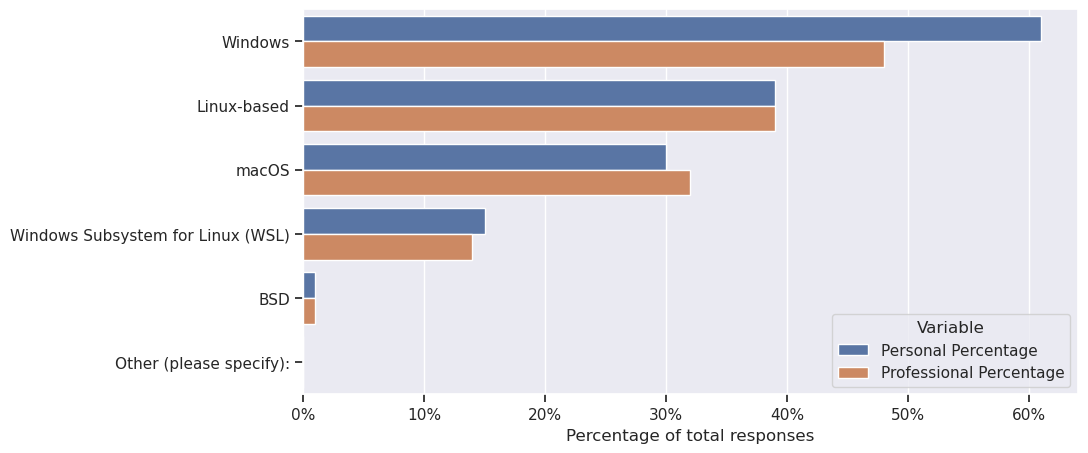

In [152]:
tidy_use=use_df[['OpSys','Personal Percentage','Professional Percentage']].melt(id_vars='OpSys').rename(columns=str.title)
fig, ax1 = plt.subplots(figsize=(10, 5))
chart = sns.barplot(y='Opsys', x='Value', hue='Variable', data=tidy_use, ax=ax1)
chart.axes.xaxis.set_major_formatter(PercentFormatter(1))
ax1.set_xlabel("Percentage of total responses")
ax1.set_ylabel("")
plt.show()

## WSL Professional Users by Job Role

In [143]:
#Create base table of WSL only answers
wsldf = dfpro[dfpro['OpSysProfessional use']=='Windows Subsystem for Linux (WSL)']


In [144]:
#Break down by devtype
devdf = col_expand(wsldf,'DevType',';')
devsum= devdf['DevType'].value_counts().rename_axis('DevType').reset_index(name='WSLCount')
devsum['WSLpercent']=round(devsum['WSLCount']/len(wsldf.index),2)

In [145]:
#Compare with global
devalldf = col_expand(df,'DevType',';')
devallsum =devalldf['DevType'].value_counts().rename_axis('DevType').reset_index(name='AllCount')
devallsum['ALLpercent']=round(devallsum['AllCount']/len(df.index),2)

devsum = devsum.merge(devallsum, how = 'left', on='DevType')
devsum['WSLvAll']=round(devsum['WSLCount']/devsum['AllCount'],2)
devsum.sort_values(by='WSLvAll', ascending = False)

,DevType,WSLCount,WSLpercent,AllCount,ALLpercent,WSLvAll
4,DevOps specialist,1495,0.15,6170,0.08,0.24
5,Cloud infrastructure engineer,1235,0.12,5283,0.07,0.23
20,Security professional,445,0.04,1928,0.03,0.23
10,"Developer, embedded applications or devices",821,0.08,3923,0.05,0.21
8,Database administrator,967,0.09,4934,0.07,0.20
21,"Engineer, site reliability",384,0.04,1947,0.03,0.20
23,"Developer, game or graphics",376,0.04,1837,0.03,0.20
28,Marketing or sales professional,102,0.01,518,0.01,0.20
6,System administrator,1002,0.10,4908,0.07,0.20
3,"Developer, desktop or enterprise applications",1875,0.18,9546,0.13,0.20


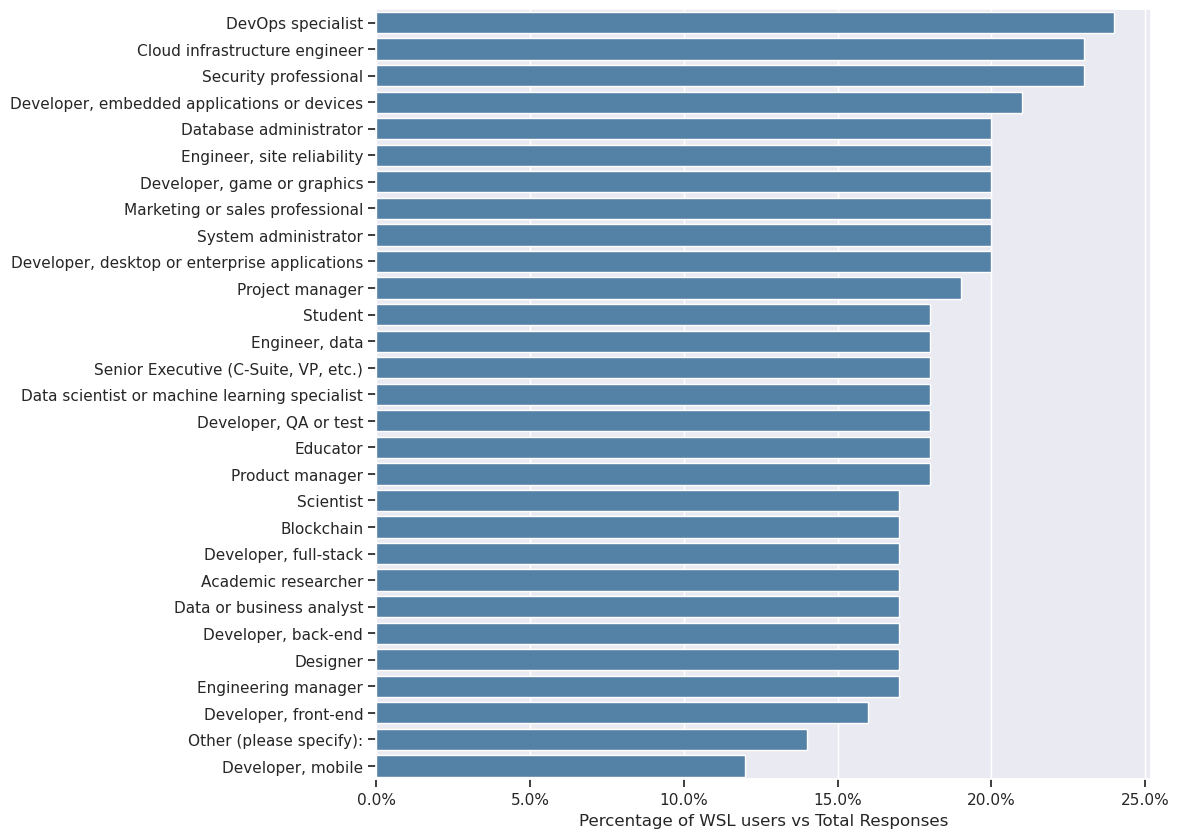

In [149]:
fig, ax1 = plt.subplots(figsize=(10, 10))
chart = sns.barplot(y='DevType', x='WSLvAll', data=devsum.sort_values(by='WSLvAll', ascending = False), color='SteelBlue', ax=ax1)
chart.axes.xaxis.set_major_formatter(PercentFormatter(1))
ax1.set_xlabel("Percentage of WSL users vs Total Responses")
ax1.set_ylabel("")
plt.show()

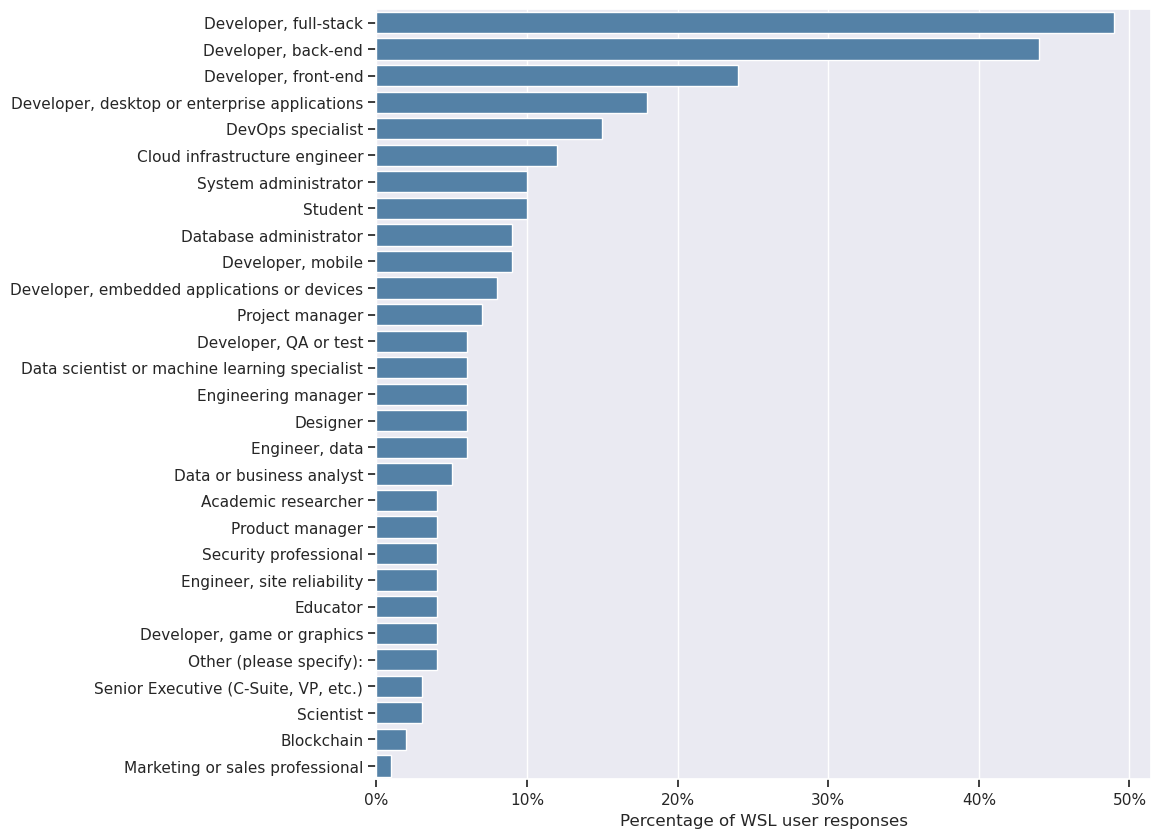

In [150]:
fig, ax1 = plt.subplots(figsize=(10, 10))
chart = sns.barplot(y='DevType', x='WSLpercent', data=devsum.sort_values(by='WSLpercent', ascending = False), color='SteelBlue', ax=ax1)
chart.axes.xaxis.set_major_formatter(PercentFormatter(1))
ax1.set_xlabel("Percentage of WSL user responses")
ax1.set_ylabel("")
plt.show()

## Preferred Tools / Tech of WSL Users